# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [16]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [17]:
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=&q="
query = url + url + "appid=" + weather_api_key + city + "&q=" + "&units=imperial" 
weather = requests.get(url).json()


# set lists
city_list = []
cloud_list = []
date_l = []
humidity_list = []
lats_l = []
long_l = []
max_temps = []
wind_speeds = []
countries = []

# set counter
counter1 = 0
setcounter = 1

# for loops ro create df columns
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloud_list.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        date_l.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lats_l.append(response['coord']['lat'])
        long_l.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if counter1 > 49:
            counter = 1
            setcounter += 1
            city_list.append(city)
        else:
            counter1 += 1
            city_list.append(city)
        print(f"Processing Record {counter1} of Set {setcounter} | {city}")
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mount gambier
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | yulara
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | tacuarembo
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | richards bay
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | prince rupert
City not found. Skipping...
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | jos
Processing Record 21 of Set 1 | oyon
Processing Record 22 of Set 1 | butaritari
Processing Record 23 of Set 1 | whitehorse
Processing Record 24 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# create dictionary
weather_dict = {
    "City":city_list,
    "Cloudiness":cloud_list,
    "Country":countries,
    "Date":date_l,
    "Humidity":humidity_list,
    "Lat":lats_l,
    "Lng":long_l,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [19]:
weather_df = pd.DataFrame(weather_dict)
weather_df.to_csv('weather_data.csv')
weather_df.to_csv("../starter_code/weather_data.csv")
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,rikitea,36,PF,1645576864,73,-23.1203,-134.9692,299.46,5.97
1,punta arenas,71,PH,1645576864,66,8.9897,125.3400,301.02,3.03
2,mount gambier,11,GB,1645576864,73,53.6597,-1.8537,279.27,2.68
3,bluff,17,NZ,1645576865,54,-46.6000,168.3333,290.82,5.57
4,bengkulu,67,ID,1645576865,79,-3.8004,102.2655,299.02,2.11
...,...,...,...,...,...,...,...,...,...
535,mecca,90,SA,1645576913,77,21.4267,39.8261,294.09,0.41
536,kayseri,40,TR,1645577109,93,38.7370,35.4968,273.16,0.00
537,chapleau,100,CA,1645577110,78,47.8405,-83.4034,256.20,8.75
538,coos bay,19,US,1645577110,75,43.1665,-124.0015,280.52,2.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

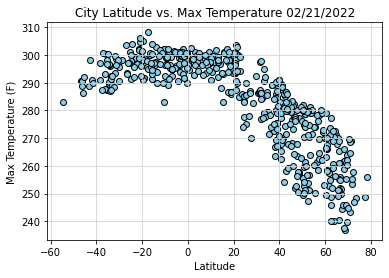

In [20]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig1.png")
plt.show()

## Latitude vs. Humidity Plot

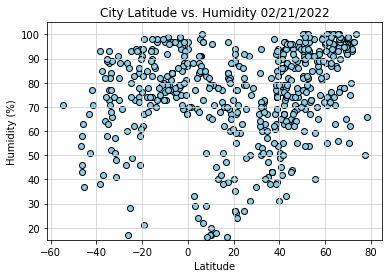

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

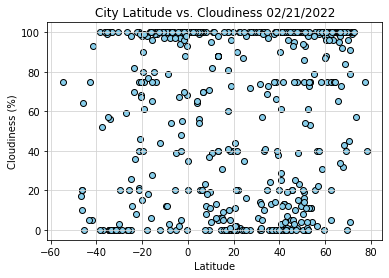

In [22]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig3.png")
plt.show()


## Latitude vs. Wind Speed Plot

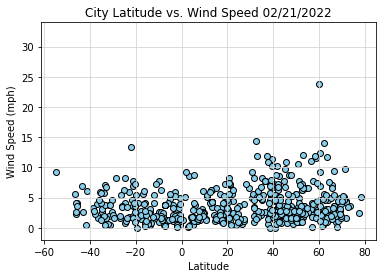

In [23]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed 02/21/2022")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../starter_codefig1.png")
plt.show()

## Linear Regression

In [24]:
# def makeLinRegression(df, x_Col, y_Col):
#     (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], 
#                                                            df[y_Col])
#     regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
#     regr_line_y = regr_slope * regr_line_x + regr_intercept  
    
#     df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, 
#                       title="{} vs. {} ({})"
#                         .format(y_Col, x_Col, weather_df["Datetime (Local)"].iloc[0].split(",")[0])) 
#     df_axes.plot(regr_line_x, regr_line_y, 'r')
   
#     return df_axes 

def regression(lat, weather, ylabel, title, filepath):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(lat, weather)
    regress_values = lat * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(lat, weather)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(f'{title} vs. Latitude 02/07/22')
    plt.plot(lat, regress_values,"g-")
    plt.annotate(line_eq,(5,-30),fontsize=12,color="orange")
    plt.grid()
    print(f"The r-value is: {rvalue**2}")
    plt.savefig(filepath)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
#northern df
northern_hp = weather_df.loc[weather_df["Lat"] >= 0]
northern_cities = len(northern_hp)


#variables for northern hemisphere
north_cloud = northern_hp["Cloudiness"]
north_hum = northern_hp["Humidity"]
north_lat = northern_hp["Lat"]
north_wind = northern_hp["Wind Speed"]
north_temp = northern_hp["Max Temp"]

northern_cities

378

The r-value is: 0.7108599847555541


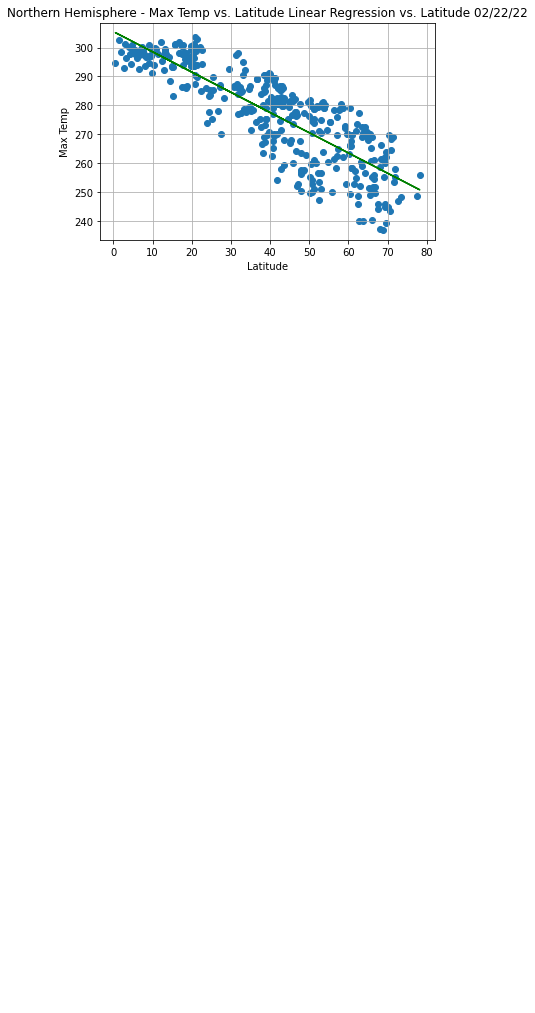

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression vs. Latitude 02/22/22')
plt.plot(north_lat, regress_values,"g-")
plt.annotate(line_eq,(5,-30),fontsize=12,color="orange")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig("../starter_northern1.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
#southern df
southern_hp = weather_df.loc[weather_df["Lat"] < 0]
southern_cities = len(southern_hp)

#variables for southern hemisphere
south_cloud = southern_hp["Cloudiness"]
south_hum = southern_hp["Humidity"]
south_lat = southern_hp["Lat"]
south_wind = southern_hp["Wind Speed"]
south_temp = southern_hp["Max Temp"]

southern_cities

162

The r-value is: 0.1384860802116868


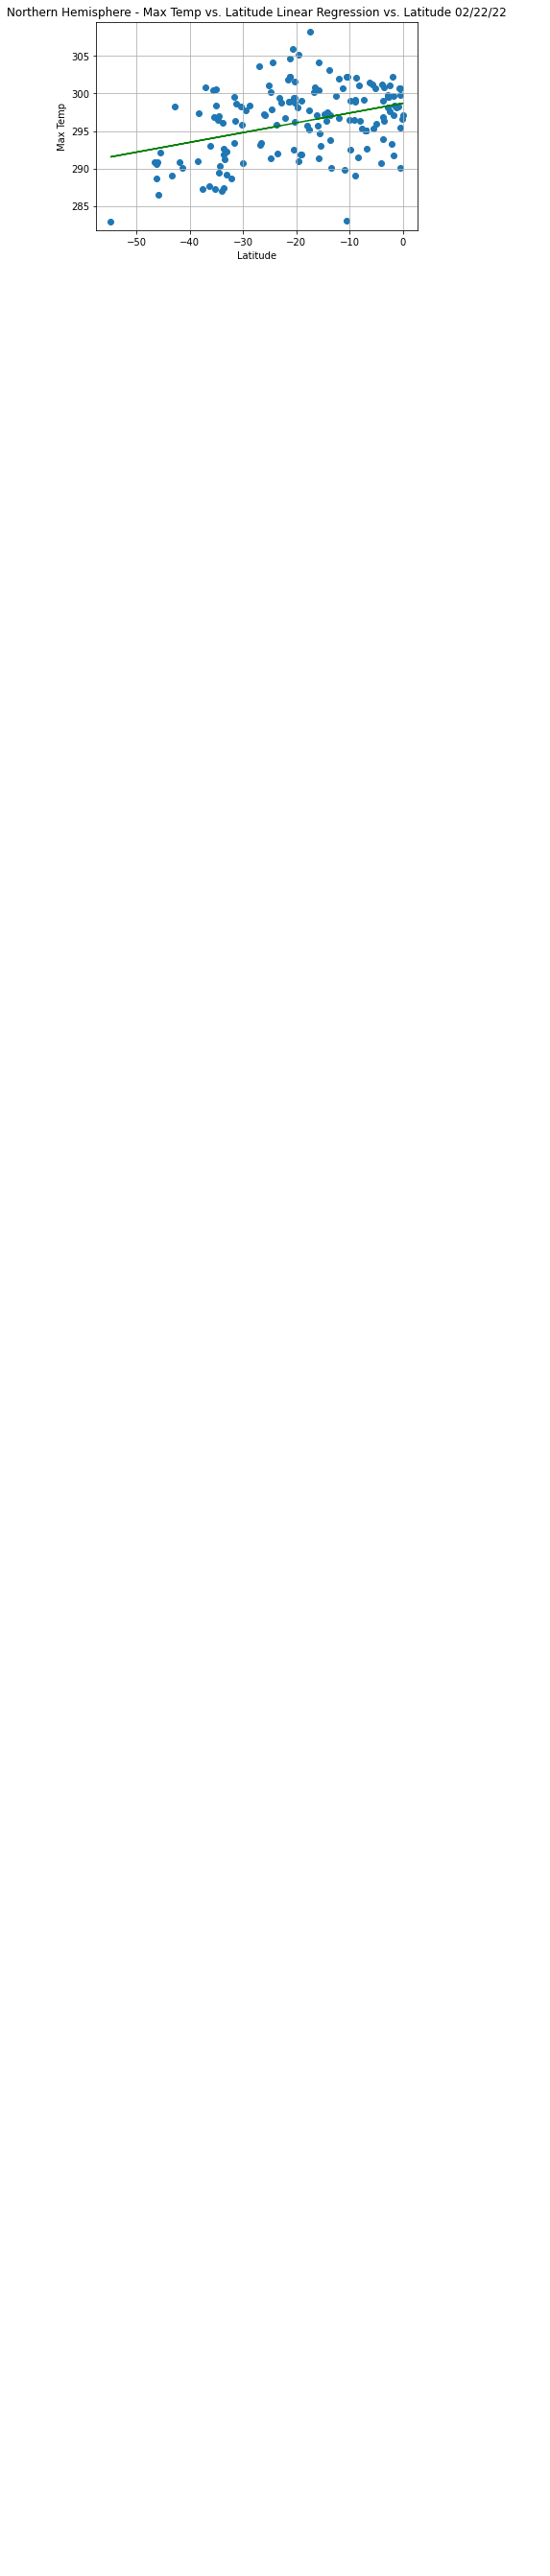

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude Linear Regression vs. Latitude 02/22/22')
plt.plot(south_lat, regress_values,"g-")
plt.annotate(line_eq,(5,-30),fontsize=12,color="orange")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig("../starter_southern1.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20562745485035783


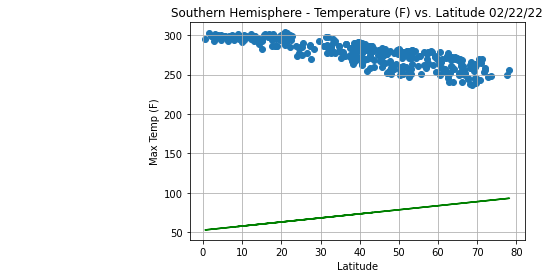

In [32]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_hum)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude 02/22/22')
plt.plot(north_lat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../starter_codefig4.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.20676252551649082


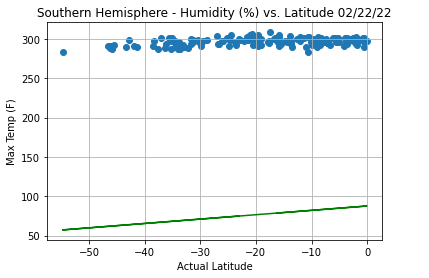

In [42]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_hum)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_temp)
plt.xlabel('Actual Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude 02/22/22')
plt.plot(south_lat, regress_values,"g-")
plt.annotate(line_eq,(-10, 22),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../southern_humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05028737336823796


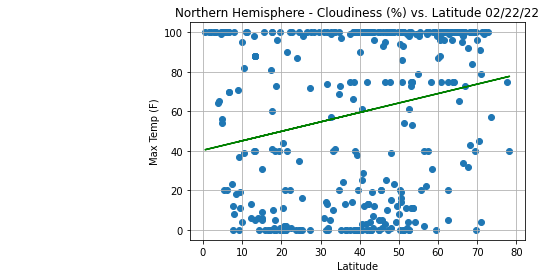

In [45]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloud)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_cloud)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude 02/22/22')
plt.plot(north_lat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../Norther_cloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13319117123774182


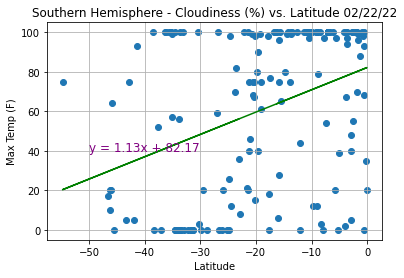

In [46]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloud)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_cloud)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude 02/22/22')
plt.plot(south_lat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../southern_cloudiness.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.013770017523392485


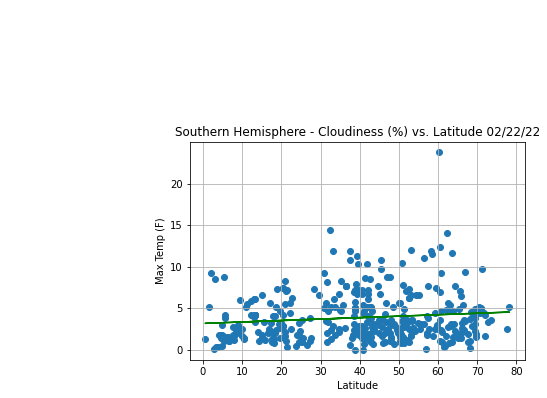

In [47]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_wind)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_lat, north_wind)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere - Wind (%) vs. Latitude 02/22/22')
plt.plot(north_lat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../northern_wind.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06025083722678041


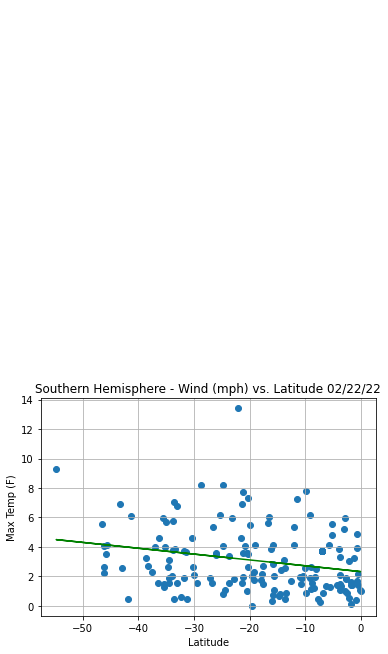

In [48]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_wind)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_lat, south_wind)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Wind (mph) vs. Latitude 02/22/22')
plt.plot(south_lat, regress_values,"g-")
plt.annotate(line_eq,(-50,40),fontsize=12,color="purple")
plt.grid()
print(f"The r-value is: {rvalue**2}")
plt.savefig('../southern_wind.png')
plt.show()